In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Create the dataset
data = {
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)


df


,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31-40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31-40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [3]:
# Calculate the entropy at the root node
class_counts = df['buys_computer'].value_counts()
class_probabilities = class_counts / len(df)
root_entropy = -np.sum(class_probabilities * np.log2(class_probabilities))

# Calculate the entropy and information gain for each attribute
attributes = ['age', 'income', 'student', 'credit_rating']
entropies = []
information_gains = []

for attribute in attributes:
    attribute_entropy = 0
    attribute_information_gain = 0

    # Split the dataset based on the unique values of the attribute
    attribute_values = df[attribute].unique()
    for value in attribute_values:
        subset = df[df[attribute] == value]
        subset_class_counts = subset['buys_computer'].value_counts()
        subset_class_probabilities = subset_class_counts / len(subset)
        subset_entropy = -np.sum(subset_class_probabilities * np.log2(subset_class_probabilities))
        attribute_entropy += (len(subset) / len(df)) * subset_entropy

    # Calculate the information gain for the attribute
    attribute_information_gain = root_entropy - attribute_entropy

    entropies.append(attribute_entropy)
    information_gains.append(attribute_information_gain)
# Find the attribute with the highest Information Gain (the root node)
root_node_index = np.argmax(information_gains)
root_node_attribute = attributes[root_node_index]
root_node_information_gain = information_gains[root_node_index]

print(f"The root node is '{root_node_attribute}' with Information Gain {root_node_information_gain:.4f}")

# Print the entropies and information gains
for i in range(len(attributes)):
    print(f"Entropy for {attributes[i]}: {entropies[i]}")
    print(f"Information Gain for {attributes[i]}: {information_gains[i]}")

The root node is 'age' with Information Gain 0.2467
Entropy for age: 0.6935361388961918
Information Gain for age: 0.24674981977443933
Entropy for income: 0.9110633930116763
Information Gain for income: 0.02922256565895487
Entropy for student: 0.7884504573082896
Information Gain for student: 0.15183550136234159
Entropy for credit_rating: 0.8921589282623617
Information Gain for credit_rating: 0.04812703040826949


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

X = df.drop(columns=['buys_computer'])
y = df['buys_computer']

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the data
clf.fit(X, y)

# Calculate the depth of the constructed tree
depth = clf.get_depth()
print("Depth of the Decision Tree:", depth)

Depth of the Decision Tree: 4


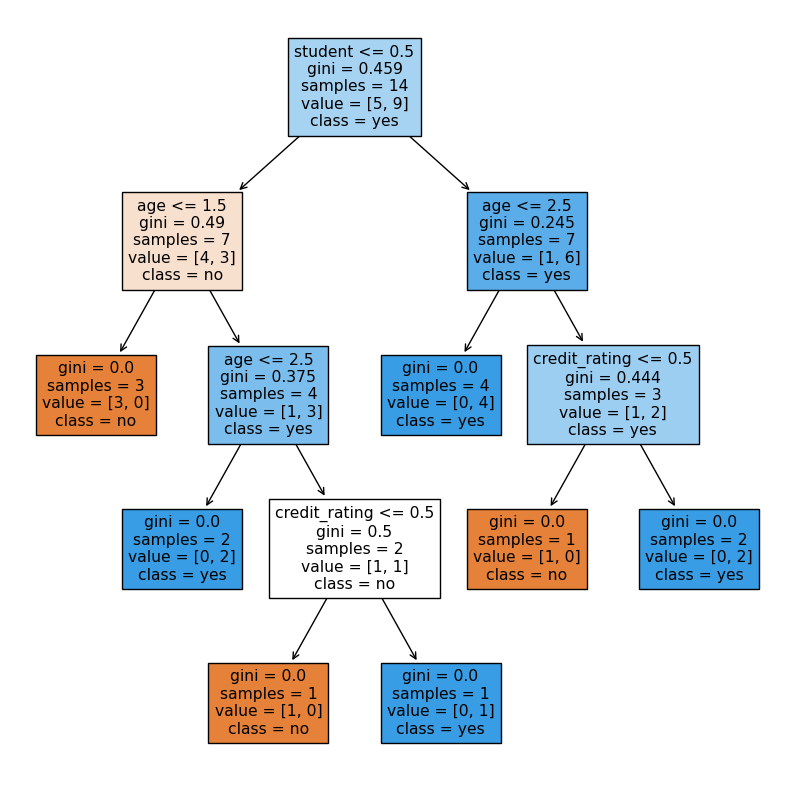

In [10]:
import matplotlib.pyplot as plt
from sklearn import tree
# Convert categorical variables to numerical
age_num = [1, 1, 2, 3, 3, 3, 2, 1, 1, 3, 1, 2, 2, 3]
income_num = [2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1]
student_num = [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
credit_rating_num = [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0]
buys_computer_num = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

 

# Combine the numerical features into a single feature matrix
X = list(zip(age_num, income_num, student_num, credit_rating_num))

 

# Combine the target variable into a single target vector
y = buys_computer_num

 

# Construct the decision tree model
model = tree.DecisionTreeClassifier()
model.fit(X, y)

 

# Visualize the decision tree
plt.figure(figsize=(10, 10))
tree.plot_tree(model, filled=True, feature_names=['age', 'income', 'student', 'credit_rating'], class_names=['no', 'yes'])
plt.show()

In [5]:
import numpy as np 
import pandas as pd 
training_data=pd.read_excel(r'C:\Users\hemanth\Downloads\ML DATA SET\training_c.xlsx')
testing_data=pd.read_excel(r'C:\Users\hemanth\Downloads\ML DATA SET\testing_c.xlsx')

Training Set Accuracy: 0.9778172138420586
Test Set Accuracy: 0.9571428571428572


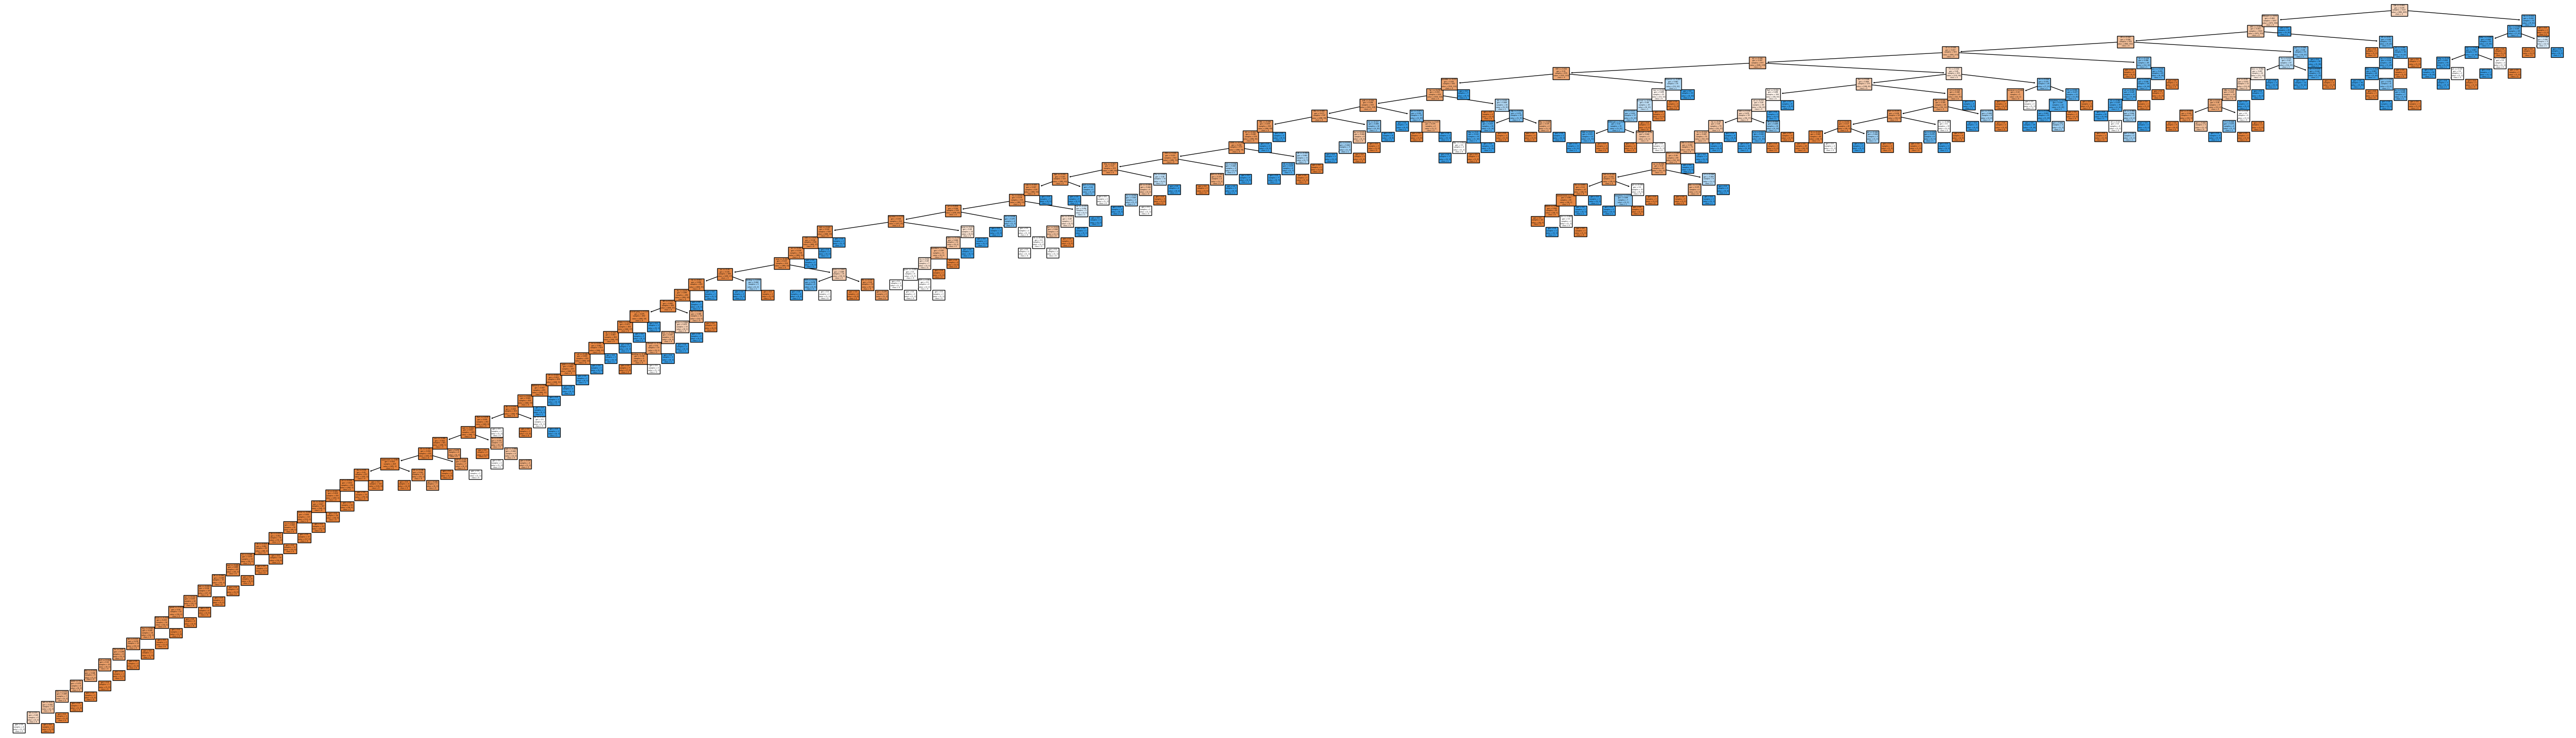

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Fill missing values
training_data['input'].fillna('', inplace=True)
testing_data['Equation'].fillna('', inplace=True)

# Split data into features and target
Tr_X = training_data['input']
Tr_y = training_data['Classification']

Te_X = testing_data['Equation']
Te_y = testing_data['Classification']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the text data into TF-IDF features
Tr_X = tfidf_vectorizer.fit_transform(Tr_X)
Te_X = tfidf_vectorizer.transform(Te_X)

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out().tolist()

# Create and train the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Calculate accuracy on training and test data
train_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

# Plot the Decision Tree
plt.figure(figsize=(70, 20))
plot_tree(model, filled=True, feature_names=feature_names, class_names=["0", "1"])
plt.show()


Training Set Accuracy (max_depth=5): 0.76
Test Set Accuracy (max_depth=5): 0.67


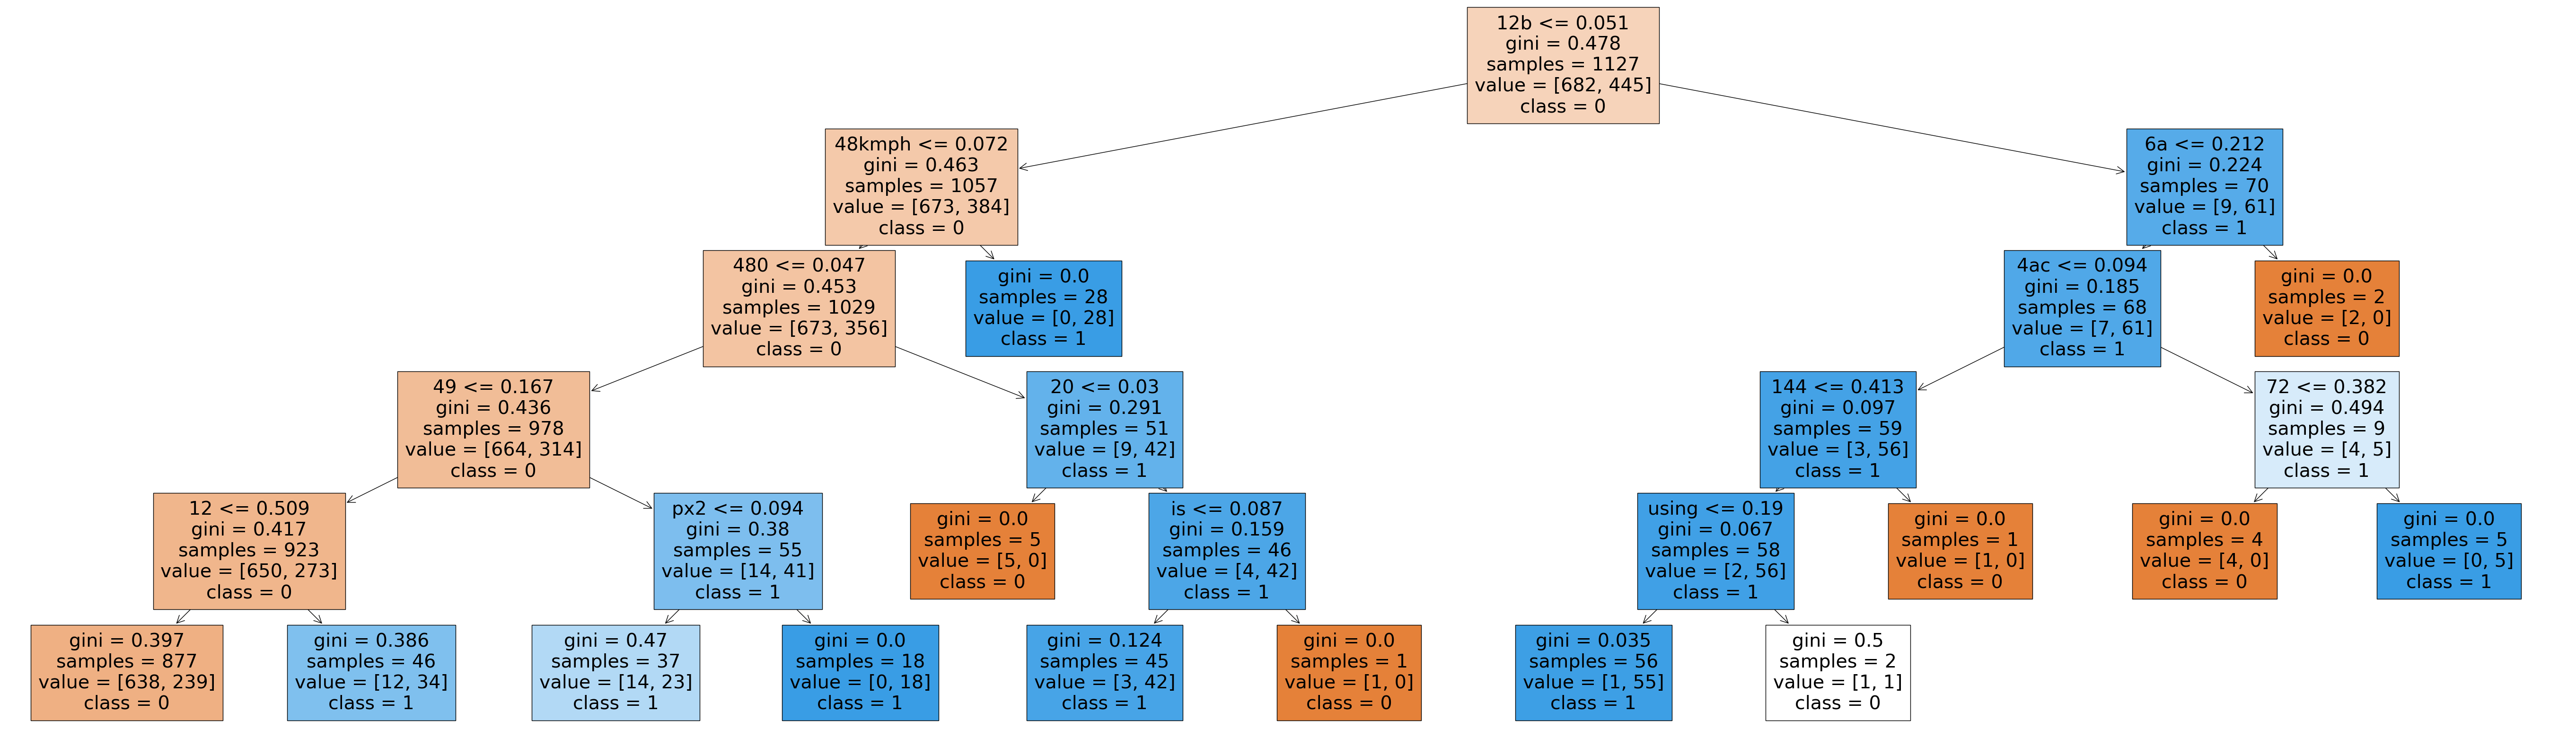

In [8]:

# Set the max_depth constraint
max_depth = 5  # Adjust the value as needed

# Create and train the Decision Tree classifier with max_depth constraint
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(Tr_X, Tr_y)

train_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy (max_depth={max_depth}): {train_accuracy:.2f}")
print(f"Test Set Accuracy (max_depth={max_depth}): {test_accuracy:.2f}")

# Plot the Decision Tree with max_depth constraint
plt.figure(figsize=(70, 20))
plot_tree(model, filled=True, feature_names=feature_names, class_names=["0", "1"])
plt.show()



Training Set Accuracy with 'entropy' criterion: 0.7542147293700089
Test Set Accuracy with 'entropy' criterion: 0.6857142857142857


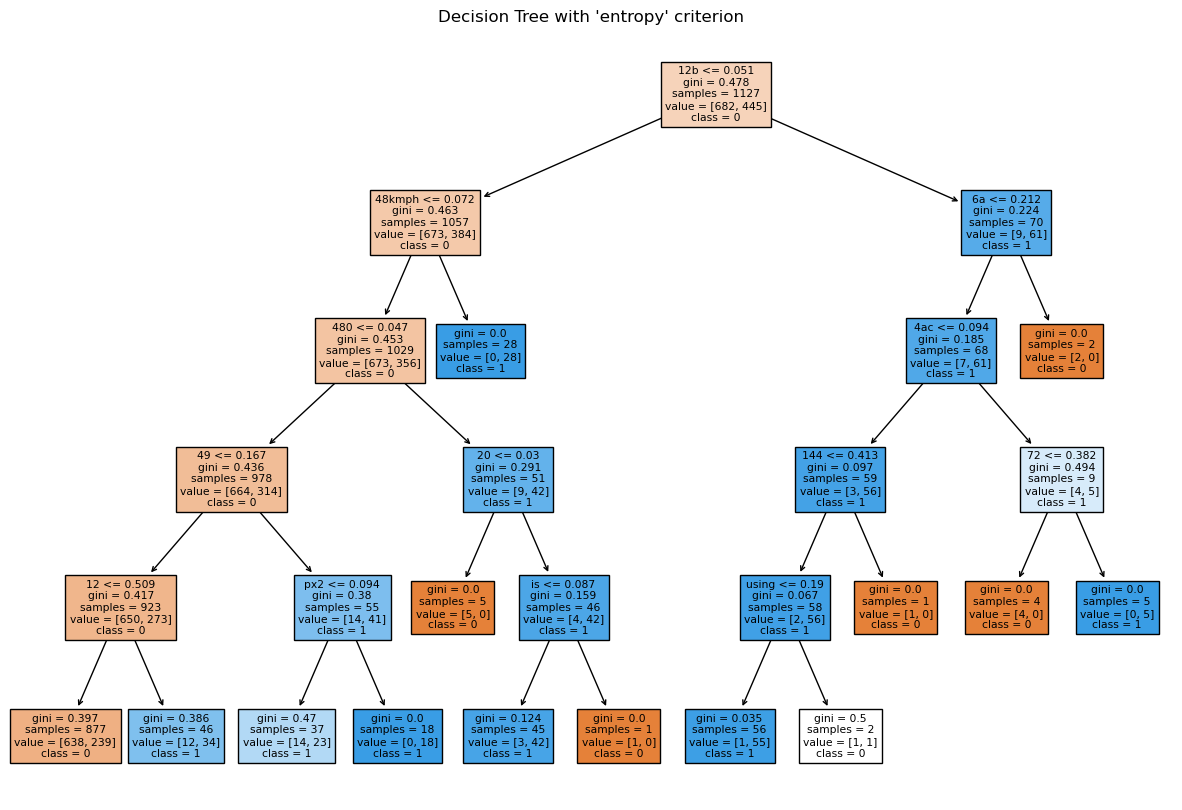

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
Tr_X = vectorizer.fit_transform(training_data['input'])
Te_X = vectorizer.transform(testing_data['Equation'])

Tr_y = training_data['Classification']
Te_y = testing_data['Classification']

your_feature_names = vectorizer.get_feature_names_out()


model_entropy = DecisionTreeClassifier(max_depth=5, criterion="entropy")
model_entropy.fit(Tr_X, Tr_y)

training_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
test_accuracy_entropy = model_entropy.score(Te_X, Te_y)

print("\nTraining Set Accuracy with 'entropy' criterion:", training_accuracy_entropy)
print("Test Set Accuracy with 'entropy' criterion:", test_accuracy_entropy)

plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=feature_names, class_names=["0", "1"])
plt.title("Decision Tree with 'entropy' criterion")
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(training_data['input'])
X_test = vectorizer.transform(testing_data['Equation'])

y = training_data['Classification']
y_test = testing_data['Classification']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_val)
accuracy_dt = accuracy_score(y_val, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_val, y_pred_dt)
classification_report_dt = classification_report(y_val, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Confusion Matrix:\n", confusion_matrix_dt)
print("Decision Tree Classification Report:\n", classification_report_dt)

random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_val, y_pred_rf)
classification_report_rf = classification_report(y_val, y_pred_rf)

print("\nRandom Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", confusion_matrix_rf)
print("Random Forest Classification Report:\n", classification_report_rf)

Decision Tree Accuracy: 0.7345132743362832
Decision Tree Confusion Matrix:
 [[136   5]
 [ 55  30]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.96      0.82       141
           1       0.86      0.35      0.50        85

    accuracy                           0.73       226
   macro avg       0.78      0.66      0.66       226
weighted avg       0.77      0.73      0.70       226


Random Forest Accuracy: 0.7345132743362832
Random Forest Confusion Matrix:
 [[137   4]
 [ 56  29]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.97      0.82       141
           1       0.88      0.34      0.49        85

    accuracy                           0.73       226
   macro avg       0.79      0.66      0.66       226
weighted avg       0.77      0.73      0.70       226

